## Diabetes  Classification Using Naive Bayes classifier

Student Name - Id

Rahma Obaid - 2109626

Mabrokah AL-Harbi - 2105838

# **Import necessary libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from google.colab import files


## **1- Load Dataset**

In [ ]:
# Uploading the dataset
uploaded = files.upload()

Saving diabetes (1).csv to diabetes (1).csv


In [ ]:
#Loading the dataset
dataset_path = list(uploaded.keys())[0]
data = pd.read_csv(dataset_path)

In [ ]:

print("\n Data Info :")
print(data.info())

print()

print("\n Data samples :")
print(data.head())

print()
print("\n Data description :")
print(data.describe())


 Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


 Data samples :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29      

### **2- Data Preprocessing**

In [ ]:
# 1- Handle missing values

#Identify null values with boolean true/false
print("\nMissing values in each column before:")
print(data.isnull().sum())


Missing values in each column before:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#replacing missing values with column mean for numerical features
for column in data.select_dtypes(include=[np.number]).columns:
    data[column] = data[column].fillna(data[column].mean())

In [ ]:
#missing values for categorical values
for column in data.select_dtypes(include=[object]).columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [ ]:
#outliers using IQR
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

In [ ]:
#categorical variables to numerical using one-hot encoding
categorical_columns = data.select_dtypes(include=[object]).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(categorical_columns, axis=1), categorical_data], axis=1)

In [ ]:
#Normalization numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
scaled_data = scaler.fit_transform(data[numerical_columns])
data[numerical_columns] = scaled_data


In [ ]:
#features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#target variable is categorical
y = y.astype(int)

In [ ]:
# Display the first few rows of the preprocessed data
print ("\nData after preprocessing:")
print(data.head())

print("\n Data description :")
print(data.describe())


Data after preprocessing:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.647150  0.861926       0.092691       0.914986 -0.787602  0.209359   
1    -0.848970 -1.159433      -0.330201       0.536065 -0.787602 -0.784254   
2     1.245598  1.984903      -0.471166      -1.295388 -0.787602 -1.252672   
3    -0.848970 -1.031093      -0.330201       0.157144  0.217583 -0.571337   
4    -1.148194  0.508990      -2.162737       0.914986  1.008900  1.557835   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.588927  1.445691  1.365896  
1                 -0.378101 -0.189304 -0.732120  
2                  0.746595 -0.103252  1.365896  
3                 -1.022787 -1.049828 -0.732120  
4                  2.596563 -0.017199  1.365896  

 Data description :
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.938894e-17 -

In [ ]:
#class imbalance - Stratification
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
# Split the data into training and testing sets, training: 80%, testing: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

**Model Training - Naïve Bayes**


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict on the test set
y_pred = nb_model.predict(X_test)


Model Accuracy: 70.50%

Confusion Matrix:
[[71 29]
 [30 70]]


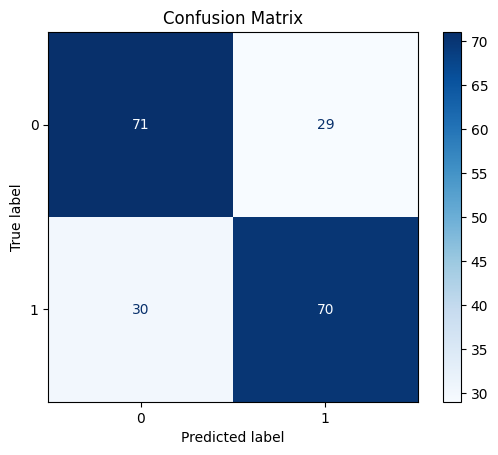


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       100
           1       0.71      0.70      0.70       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"\nModel Accuracy: {accuracy:.2f}%")

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualization of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))